In [1]:
#### Import packages needed (and some not needed....)

import Bio

import openpyxl
from Bio import SeqIO
import os,sys,re

import pandas as pd
print(pd.__name__, pd.__version__)

import numpy as np
print(np.__name__, np.__version__)

import matplotlib.pyplot as plt
import matplotlib
print(matplotlib.__name__, matplotlib.__version__)
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import MaxNLocator

import scipy.stats as stats
import scipy
print(scipy.__name__, scipy.__version__)

import seaborn as sns
print(sns.__name__, sns.__version__)

from collections import Counter

import scipy as sp
import math
from scipy.stats import shapiro 
from scipy.stats import lognorm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from scipy.stats import ttest_rel
from scipy.stats import permutation_test

pandas 1.5.2
numpy 1.23.5
matplotlib 3.4.1
scipy 1.10.0
seaborn 0.12.2


In [2]:
df_none = pd.read_csv("../Nothing/Select_coeff_p_value_aa_No antifungal_NovaSeq_winter2023_albicans_2023-12-07.csv", header=0)
df_fluco = pd.read_csv("../Fluconazole/Select_coeff_p_value_aa_Fluconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_itra = pd.read_csv("../Itraconazole/Select_coeff_p_value_aa_Itraconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_vorico = pd.read_csv("../Voriconazole/Select_coeff_p_value_aa_Voriconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_posaco = pd.read_csv("../Posaconazole/Select_coeff_p_value_aa_Posaconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_isa = pd.read_csv("../Isavuconazole/Select_coeff_p_value_aa_Isavuconazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)
df_clotri = pd.read_csv("../Clotrimazole/Select_coeff_p_value_aa_Clotrimazole_NovaSeq_winter2023_albicans_2023-12-06.csv", header=0)

In [3]:
# List of dataframes
df_list = [df_none, df_fluco, df_itra, df_vorico, df_posaco, df_isa, df_clotri]

# Iterate over each dataframe
for df in df_list:
    # Create a new column 'result' based on conditions
    df['result'] = df.apply(lambda row: 'advantageous' if (row['adjusted_p_value'] < 0.01 and row['select_coef'] > 0)
                       else 'deleterious' if (row['adjusted_p_value'] < 0.01 and row['select_coef'] < 0)
                       else 'wt like', axis=1)

In [4]:
All_long = pd.concat([df_none, df_fluco,df_itra,df_vorico,df_posaco,df_isa, df_clotri],axis=0)
All_long.to_csv(f'select_coef_all_conditions_CB_2023-10-16.csv')  
All_long

,Unnamed: 0,position,Antifungal,aa,select_coef,p_value,adjusted_p_value,variant,result
0,0,55,None,*,-0.528211,8.240903e-210,8.053801e-209,55*,deleterious
1,1,55,None,A,-0.004103,7.384538e-01,8.869498e-01,55A,wt like
2,2,55,None,C,-0.009924,3.218775e-01,5.661675e-01,55C,wt like
3,3,55,None,D,-0.057636,9.785407e-11,4.824697e-10,55D,deleterious
4,4,55,None,E,-0.014590,3.389770e-02,9.943499e-02,55E,wt like
...,...,...,...,...,...,...,...,...,...
4017,4017,511,Clotri,S,0.075024,1.990360e-04,2.296708e-04,511S,advantageous
4018,4018,511,Clotri,T,-0.135075,1.193329e-12,1.606904e-12,511T,deleterious
4019,4019,511,Clotri,V,0.058365,9.611839e-03,1.057220e-02,511V,wt like
4020,4020,511,Clotri,W,0.093816,1.020725e-03,1.153510e-03,511W,advantageous


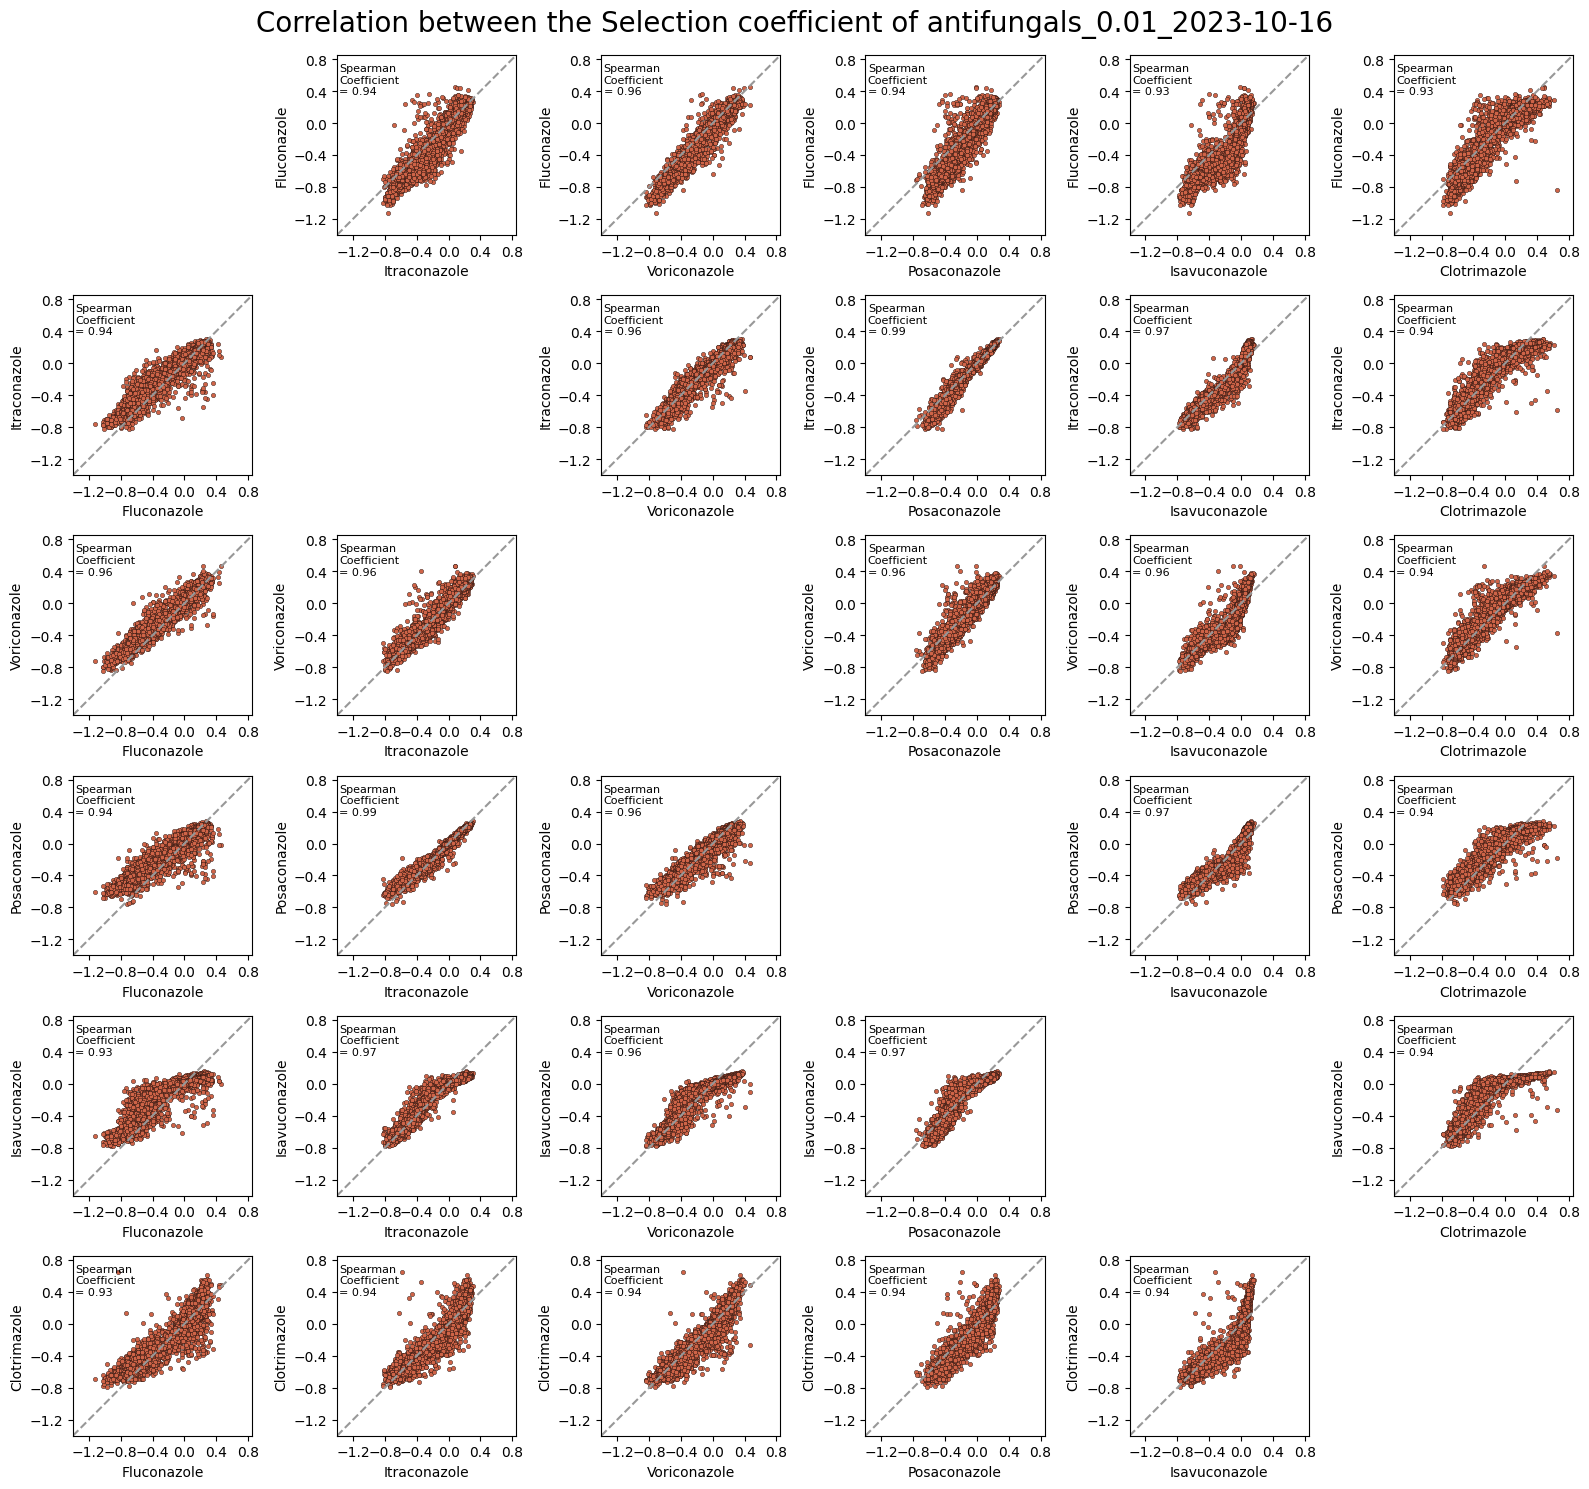

In [5]:
dataframes = [df_fluco, df_itra, df_vorico, df_posaco, df_isa, df_clotri]
labels = ['Fluconazole', 'Itraconazole', 'Voriconazole', 'Posaconazole', 'Isavuconazole', 'Clotrimazole']

# Calculate the number of subplots needed
num_plots = len(dataframes)
num_rows = num_plots
num_cols = num_plots

# Create a figure with subplots for each pair of dataframes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 15))

# Iterate over each pair of dataframes and create a scatterplot
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]
        df1 = dataframes[j]
        df2 = dataframes[i]
        x = df1["select_coef"].values.flatten()
        y = df2["select_coef"].values.flatten()
        sns.scatterplot(x=x, y=y, ax=ax, color = "#CF6448",edgecolor="black",s=10)
        ax.set_xlabel(labels[j])
        ax.set_ylabel(labels[i])
        ax.set_ylim(-1.4, 0.85)
        ax.set_xlim(-1.4, 0.85)
        x_vals = np.array([-1.4, 0.85])
        y_vals = x_vals
        
        ax.set_xticks([-1.2, -0.8, -0.4, 0,  0.4, 0.8])
        ax.set_yticks([-1.2, -0.8, -0.4, 0,  0.4, 0.8])
        # Plot the diagonal line
        ax.plot(x_vals, y_vals, '--', color="#989898")
        
        result = sp.stats.spearmanr(df1["select_coef"], df2["select_coef"])
        coeff = result[0]
        p_value = "{:.1e}".format(result[1])
        R2 = coeff**2
    
        
        text = "Spearman\nCoefficient\n= " + str(round(coeff,2))
        ax.text(-1.37,0.36, text , fontsize = 8)
            
            
# Remove plots with the same antifungal 
for i in range(num_plots):
    fig.delaxes(axes[i, i])
    
    
fig.subplots_adjust(hspace=0.31)
fig.suptitle("Correlation between the Selection coefficient of antifungals_0.01_2023-10-16", y=0.99, fontsize=20)

# Adjust the layout of subplots
fig.tight_layout()

# Display the figure
plt.show()

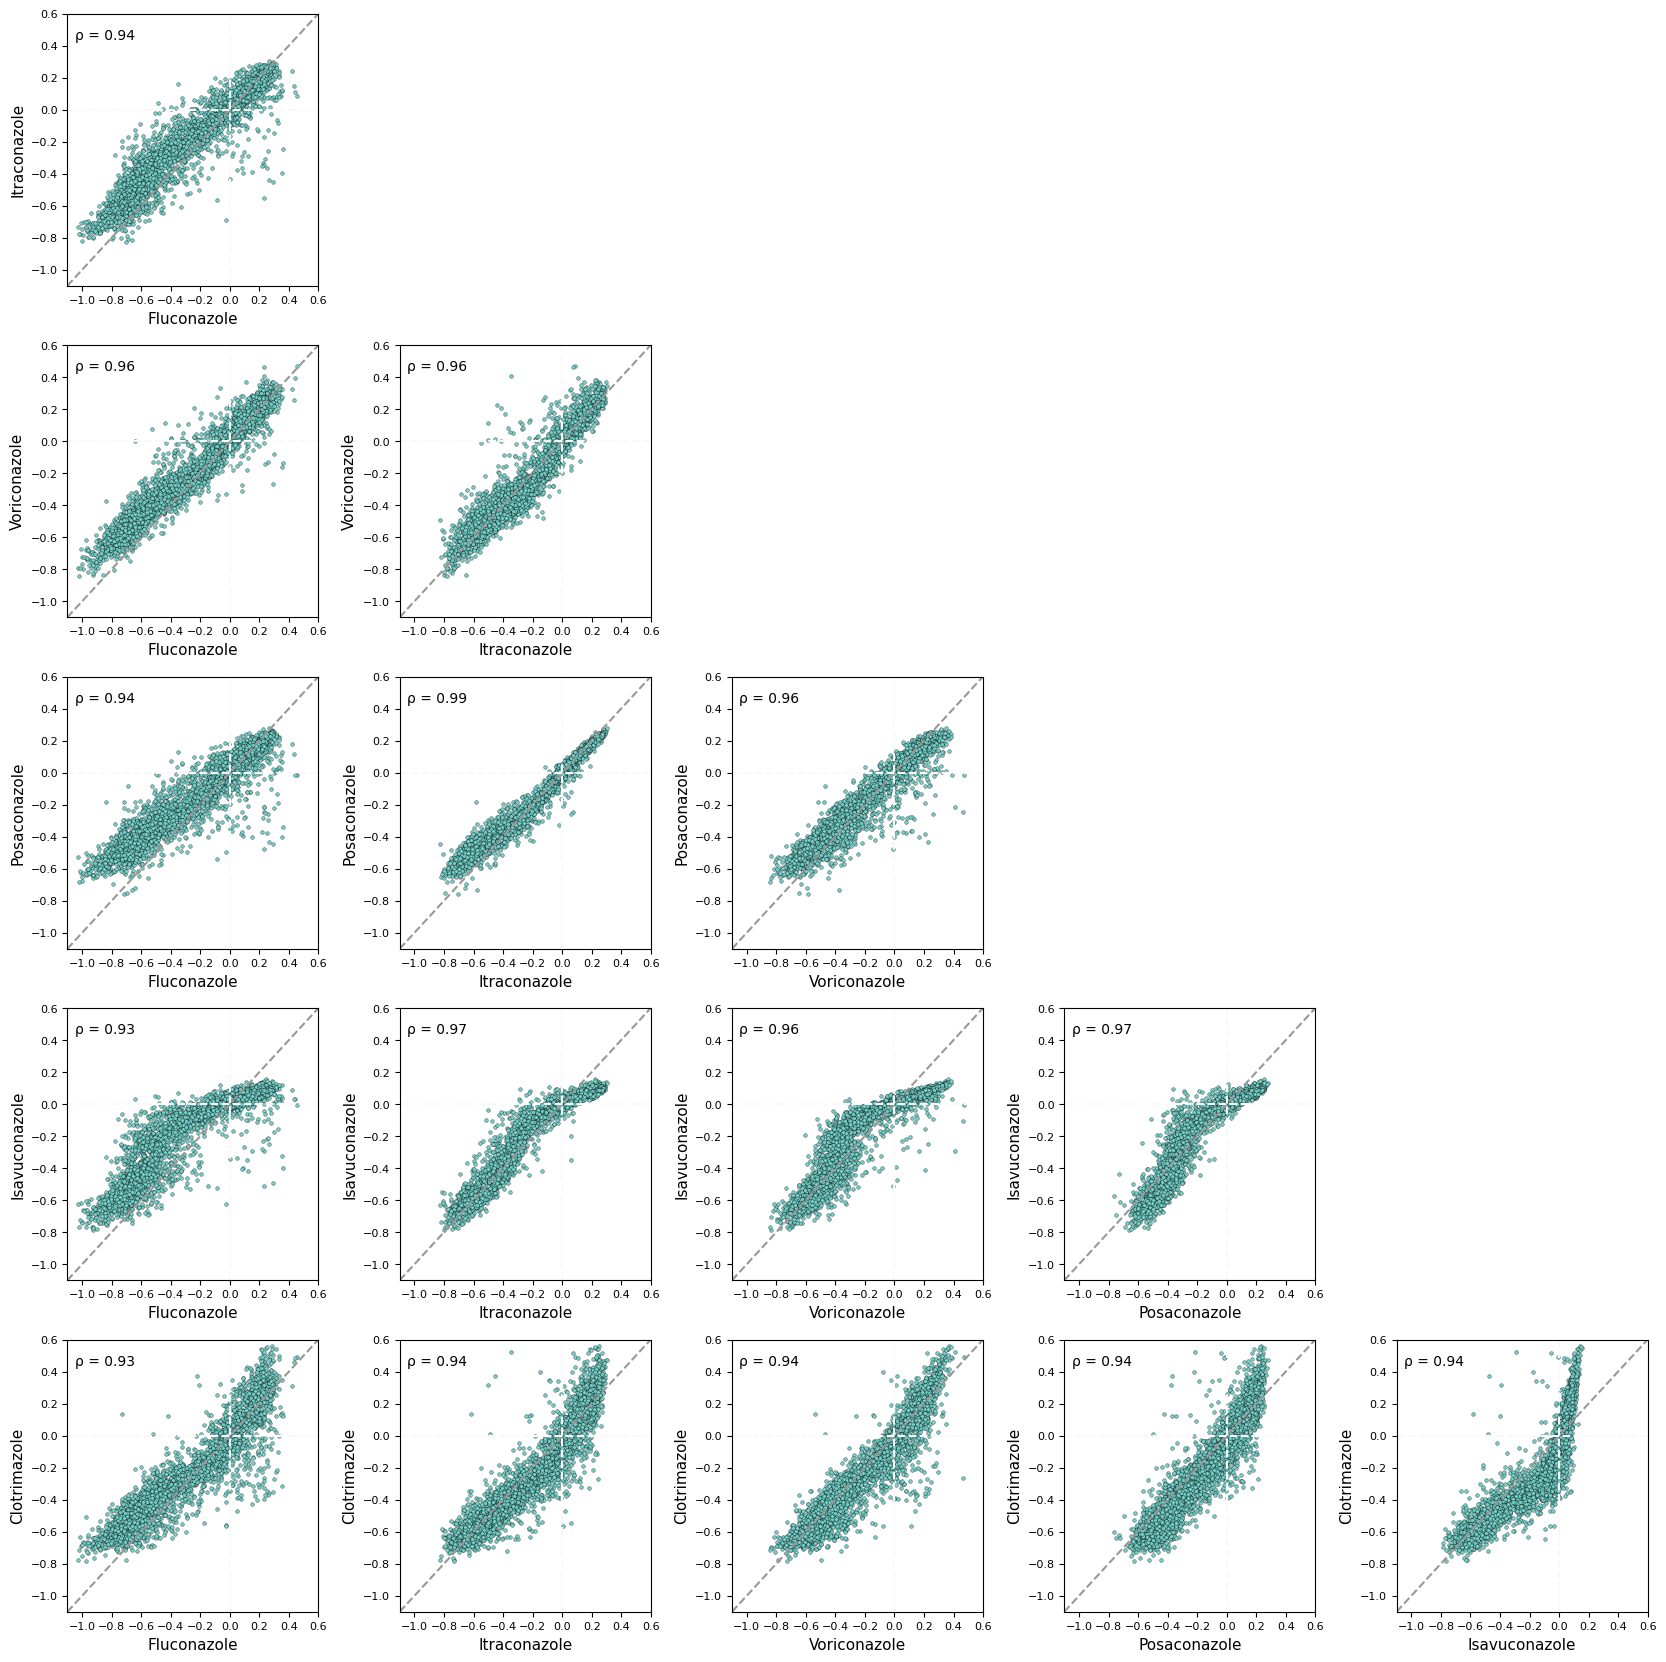

In [7]:
dataframes = [df_fluco, df_itra, df_vorico, df_posaco, df_isa, df_clotri]
labels = ['Fluconazole', 'Itraconazole', 'Voriconazole', 'Posaconazole', 'Isavuconazole', 'Clotrimazole']

# Calculate the number of subplots needed
num_plots = len(dataframes)
num_rows = num_plots
num_cols = num_plots

# Create a figure with subplots for each pair of dataframes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

# Iterate over each pair of dataframes and create a scatterplot
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]
        df1 = dataframes[j]
        df2 = dataframes[i]
        x = df1["select_coef"].values.flatten()
        y = df2["select_coef"].values.flatten()
        sns.scatterplot(x=x, y=y, ax=ax, color="#74D0C8", edgecolor="black", s=7)
        ax.set_xlabel(labels[j], fontsize=11)
        ax.set_ylabel(labels[i], fontsize=11)
        ax.set_ylim(-1.1, 0.6)
        ax.set_xlim(-1.1, 0.6)
        x_vals = np.array([-1.1, 0.6])
        y_vals = x_vals

        # Plot the diagonal line
        ax.plot(x_vals, y_vals, '--', color="#989898")
        
        ax.axhline(y=0, linestyle='--', color='#F9F9F9')
        ax.axvline(x=0, linestyle='--', color='#F9F9F9')

        result = sp.stats.spearmanr(df1["select_coef"], df2["select_coef"])
        coeff = result[0]
        p_value = "{:.1e}".format(result[1])
        R2 = coeff ** 2

        text = "ρ = " + str(round(coeff, 2))     #+ "\np-value = "  + str(p_value)
        ax.text(-1.05, 0.44, text, fontsize=10)
        
        ax.tick_params(axis='y', labelsize=8)
        ax.tick_params(axis='x', labelsize=8)
        
        ax.set_xticks([-1, -0.8, -0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6])
        ax.set_yticks([-1, -0.8, -0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6])


# Remove plots with the same antifungal
for i in range(num_plots):
    for j in range(i + 1, num_plots):
        fig.delaxes(axes[i, j])
        
# Remove plots with the same antifungal 
for i in range(num_plots):
    fig.delaxes(axes[i, i])
        
# Adjust the layout of subplots
fig.tight_layout()

plt.rcParams['svg.fonttype'] = 'none'
name = "Correlation_select_coef_all_azoles_CB_2023-10-16"


plt.savefig(f"c:{name}.png", format='png', transparent=True, dpi=400)
plt.savefig(f"c:{name}.svg", format='svg', transparent=True, dpi=400)

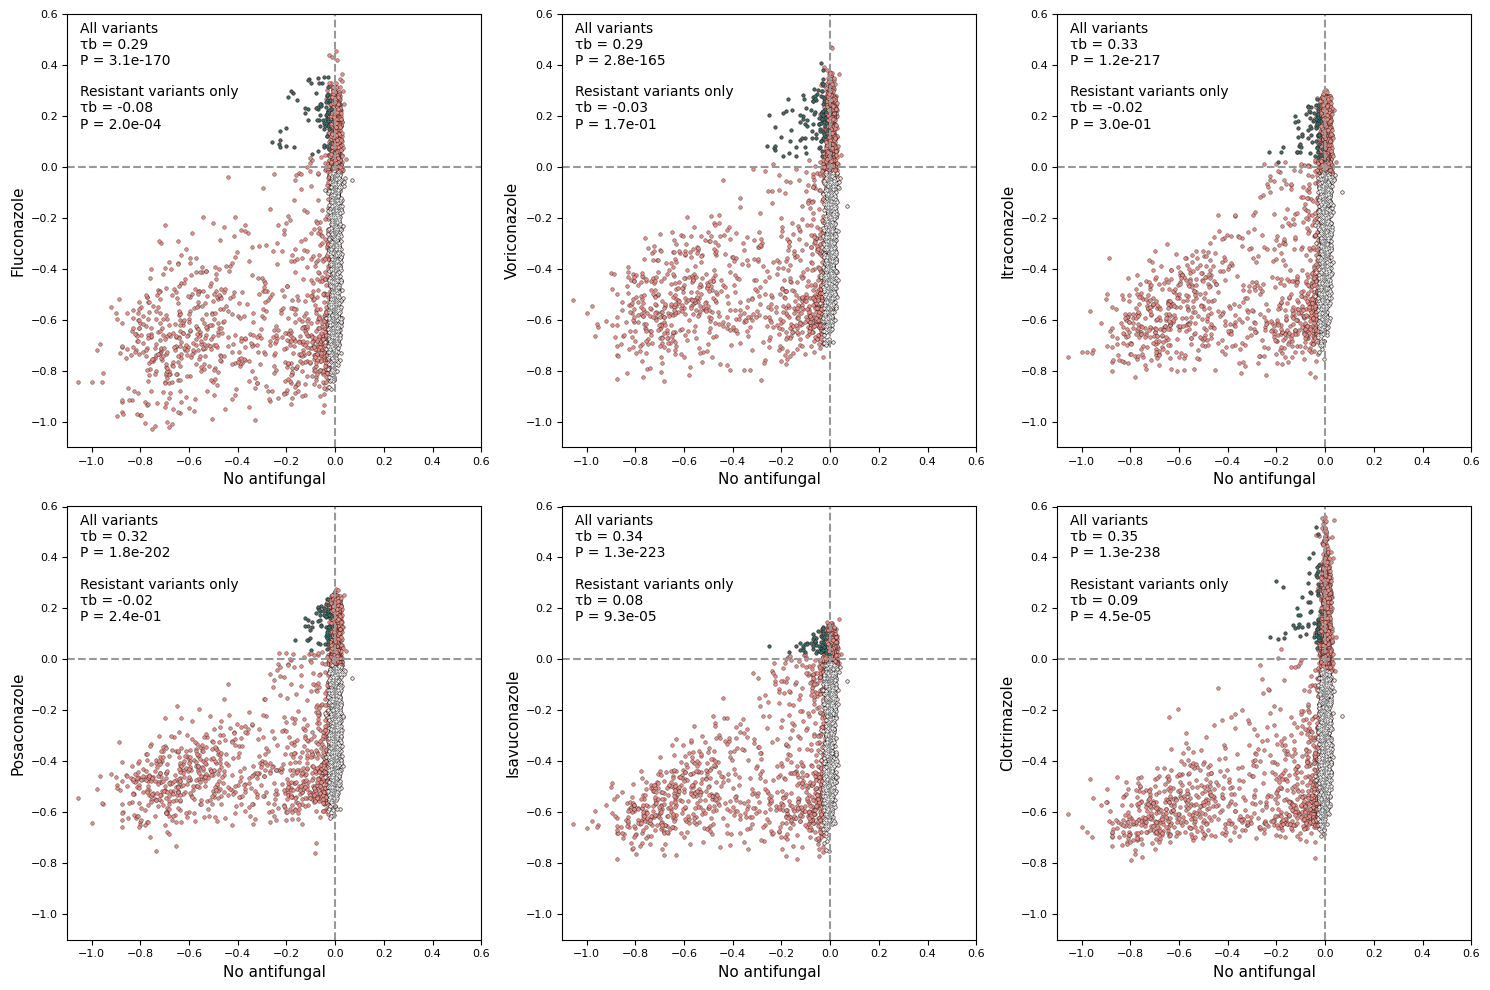

In [22]:
dataframes = [df_fluco,df_vorico, df_itra,  df_posaco, df_isa, df_clotri]
labels = ['Fluconazole', 'Voriconazole','Itraconazole',  'Posaconazole', 'Isavuconazole', 'Clotrimazole']

# Calculate the number of subplots needed
num_plots = len(dataframes)
num_rows = 2
num_cols = 3

row_list = [0,0,0,1,1,1]
col_list = [0,1,2,0,1,2]


# Create a figure with subplots for each pair of dataframes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Iterate over each pair of dataframes and create a scatterplot
for i in range(num_plots):
    trade_off = []
    dele = []
    ax = axes[row_list[i],col_list[i]]
    df2 = df_none
    df1 = dataframes[i]
    x = df2["select_coef"].values.flatten()
    y = df1["select_coef"].values.flatten()
    
    for t in range(len(df1)):
        if df1.loc[t, "result"] == "advantageous" and df2.loc[t, "result"] == "deleterious":
            trade_off.append(df1.loc[t, "variant"])
        elif df1.loc[t, "result"] == "deleterious" and df2.loc[t, "result"] != "deleterious":
            dele.append(df1.loc[t, "variant"])
            
    x = df2["select_coef"].values.flatten()
    y = df1["select_coef"].values.flatten()

    trade_off = []
    dele = []
    res = []

    for t in range(len(df1)):
        if df1.loc[t, "result"] == "advantageous" and df2.loc[t, "result"] == "deleterious":
            trade_off.append(df1.loc[t, "variant"])
        elif df1.loc[t, "result"] == "deleterious" and df2.loc[t, "result"] != "deleterious":
            dele.append(df1.loc[t, "variant"])

    for t in range(len(df1)):        
        if df1.loc[t, "result"] == "advantageous":
            res.append(df1.loc[t, "variant"])

    df1_res = df1[df1["variant"].isin(res)]
    df2_res = df2[df2["variant"].isin(res)]

    sns.scatterplot(x=x, y=y,color = "#E78E87",edgecolor="black",s=7, ax=ax)
    
    ax.set_xlabel("No antifungal", fontsize=11)
    ax.set_ylabel(labels[i], fontsize=11)
    ax.set_ylim(-1.1, 0.6)
    ax.set_xlim(-1.1, 0.6)
    x_vals = np.array([-1.1, 0.5])
    y_vals = x_vals
    
    for variant in trade_off:
        if variant in df1['variant'].values:
            sns.scatterplot(y=df1.loc[df1['variant'] == variant, 'select_coef'],
            x=df2.loc[df2['variant'] == variant, 'select_coef'],
            color='#41736F',legend=False,label=variant,edgecolor="black",s=5, ax=ax) 
            
    for variant in dele:
        if variant in df1['variant'].values:
            sns.scatterplot(y=df1.loc[df1['variant'] == variant, 'select_coef'],
            x=df2.loc[df2['variant'] == variant, 'select_coef'],
            color='#F1F1F1',legend=False,label=variant,edgecolor="black",s=5, ax=ax) 
            
    result = sp.stats.kendalltau(df2["select_coef"], df1["select_coef"])
    coeff = result[0]
    p_value = "{:.1e}".format(result[1])
    R2 = coeff**2
    text1 = "All variants\nτb = " + str(round(coeff, 2))     + "\nP = "  + str(p_value)
    ax.text(-1.05,0.4, text1 , fontsize = 10)

    result = sp.stats.kendalltau(df2_res["select_coef"], df1_res["select_coef"])
    coeff = result[0]
    p_value = "{:.1e}".format(result[1])
    R2 = coeff**2
    text2 = "Resistant variants only\nτb = " + str(round(coeff, 2))     + "\nP = "  + str(p_value)
    ax.text(-1.05,0.15, text2 , fontsize = 10)

    # Plot the diagonal line

    ax.axhline(y=0, linestyle='--', color='#989898')
    ax.axvline(x=0, linestyle='--', color='#989898')
    
    ax.set_xticks([-1, -0.8, -0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6])
    ax.set_yticks([-1, -0.8, -0.6,-0.4,-0.2, 0, 0.2, 0.4, 0.6])  
    
    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=8)

# Adjust the layout of subplots
fig.tight_layout()

plt.rcParams['svg.fonttype'] = 'none'
name = "Correlation_select_coef_no antifungal_CB_2023-10-16"


plt.savefig(f"c:{name}.png", format='png', transparent=True, dpi=400)
plt.savefig(f"c:{name}.svg", format='svg', transparent=True, dpi=400)

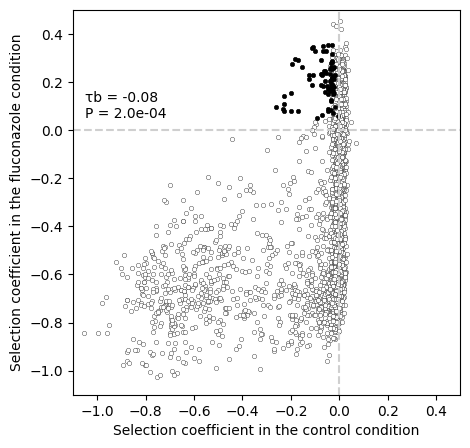

In [23]:
fig = plt.subplots(figsize=(5, 5))

plt.title(f'Selection coefficient', fontsize=12,y=1)

df1 = df_fluco
df2 = df_none

x = df2["select_coef"].values.flatten()
y = df1["select_coef"].values.flatten()

trade_off = []
dele = []
res = []

for t in range(len(df1)):
    if df1.loc[t, "result"] == "advantageous" and df2.loc[t, "result"] == "deleterious":
        trade_off.append(df1.loc[t, "variant"])
    elif df1.loc[t, "result"] == "deleterious" and df2.loc[t, "result"] != "deleterious":
        dele.append(df1.loc[t, "variant"])
        
for t in range(len(df1)):        
    if df1.loc[t, "result"] == "advantageous":
        res.append(df1.loc[t, "variant"])
        
df_fluco_res = df_fluco[df_fluco["variant"].isin(res)]
df_none_res = df_none[df_none["variant"].isin(res)]

sns.scatterplot(x=x, y=y,color = "white",edgecolor="black",s=10)

x_vals = np.array([-1.2, 0.55])
y_vals = x_vals

    # Plot the diagonal line
#plt.plot(x_vals, y_vals, '--', color="#F2F2F2")
plt.axhline(y=0, linestyle='--', color='#CFCFCF')
plt.axvline(x=0, linestyle='--', color='#CFCFCF')

plt.ylabel("Fluconazole", fontsize=12)
plt.xlabel("No antifungal", fontsize =12)
plt.ylim(-1.1, 0.5)
plt.xlim(-1.1, 0.5)

result = sp.stats.kendalltau(df_none_res["select_coef"], df_fluco_res["select_coef"])
coeff = result[0]
p_value = "{:.1e}".format(result[1])
R2 = coeff**2
text = "\nτb = " + str(round(coeff, 2))     + "\nP = "  + str(p_value)
plt.text(-1.05,0.05, text , fontsize = 10)

plt.title("")
plt.xlabel("Selection coefficient in the control condition", fontsize = 10)
plt.ylabel("Selection coefficient in the fluconazole condition", fontsize = 10)
for variant in trade_off:
    if variant in df1['variant'].values:
        sns.scatterplot(y=df1.loc[df1['variant'] == variant, 'select_coef'],
        x=df2.loc[df2['variant'] == variant, 'select_coef'],
        color='black',legend=False,label=variant,edgecolor="black",s=10) 
            
#for variant in dele:
    #if variant in df1['variant'].values:
        #sns.scatterplot(y=df1.loc[df1['variant'] == variant, 'select_coef'],
        #x=df2.loc[df2['variant'] == variant, 'select_coef'],
        #color='#989898',legend=False,label=variant,edgecolor="black",s=10) 
        
plt.rcParams['svg.fonttype'] = 'none'
name = "Correlation_select_coef_no antifungal_Fluco_CB_2023-11-27"

plt.savefig(f"c:{name}.png", format='png', transparent=True, dpi=400)
plt.savefig(f"c:{name}.svg", format='svg', transparent=True, dpi=400)